<a href="https://colab.research.google.com/github/Colsai/Education-Expenditure-Project/blob/Test-Branch/DATA601_PRJ_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA601: Project 3  
## Spring 2021, WAN 
--- 
New York High School Trends in Low Income/Poverty Markers (2015-2019)  
Scott Hirabayashi, Spring 2021

## Previous Projects:
- Project 1: EDA analysis on Chicago Public Schools
- Project 2: Analysis on trends within past 4 years comparing charter schools to neighborhood in Chicago Public Schools
- Project 3: Trends in low income/poverty metrics for students in New York Public High Schools

### Indicators to focus on:
Temp Housing: Percent of Students in Temporary Housing (metric of student poverty)
Economic Need Index: A metric that
Student Attendance Rate and Percent of Students Chronically Absent
Percent of teachers with 3 or more years of experience
Teacher Attendance Rate

### Background:
I thought a lot about a question I wanted to answer. One of the main questions was to look for trends in the Educational system in terms of. Unfortunately, a lot of these data statistics that I would like are protected (such as NAEP), but I discovered that they are listed by the City of New York for their schools. Of course, this is a small sample size to deal with, but what I want to do (and merge) is look through High Schools.


1. In this project, I'll use multiple datasets. 
2.  First, I'll take a look at general poverty statistics in schools in the NYC area.
3. Then, I'll look at specific poverty indicators in School Quality Reports.


### Major Questions
#### Economic
- How high and what is the trend of the economic need index (low income/poverty metric)? What is the trend of the temp housing index?
- For all of the schools in New York, is there a correlation between student attendance rate/chronic absenteeism and economic need/poverty? If so, how strong is the correlation?

#### General (and backup)
- Is teacher attendance rate a good predictor of student attendance rate for High Schools? (is there a correlation?)
- How does experience correlate with attendance? (Are schools with more 3+ year/experienced educators, more likely to be at schools with higher student attendance?)

In [2]:
#Packages Used for Project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
import scipy.stats

In [3]:
#Check Version of Pandas
print(f"Pandas Version: {pd.__version__}")

Pandas Version: 1.1.5


# 1. Explain and Load the Data
In the next section, I will explain the data that I have chosen, and include sources and information for reference.

## Dataset Sources for Project 3
New York Open Data Portal, Education Reports for High Schools.

The first dataset is a dataset of all schools in New York, and has data on % Poverty and Economic Need.

| Year | Data Source |  
|---|---|  
| All Years | https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD | |

In [4]:
#All Poverty Df (14-20)
df_all_poverty = df_allpov = pd.read_csv('https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD')

In [5]:
df_all_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9096 entries, 0 to 9095
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   DBN                                         9096 non-null   object 
 1   School Name                                 9096 non-null   object 
 2   Year                                        9096 non-null   object 
 3   Total Enrollment                            9096 non-null   int64  
 4   Grade 3K+PK (Half Day & Full Day)           9096 non-null   int64  
 5   Grade K                                     9096 non-null   int64  
 6   Grade 1                                     9096 non-null   int64  
 7   Grade 2                                     9096 non-null   int64  
 8   Grade 3                                     9096 non-null   int64  
 9   Grade 4                                     9096 non-null   int64  
 10  Grade 5     

We'll return to this dataset later so that we can compare these general poverty statistics with the specific ones from New York High Schools.

## Second Dataset for Project 3
This is a targeted and specific look at New York Public High Schools. Some of the poverty metrics changed in the 2014-2015 dataset, so I will only look at the last 4 years, seen here. 

Datasets used: (.gov open data)

| Year | Data Source |  
|---|---|  
| 2014/2015 | https://data.cityofnewyork.us/Education/2014-2015-School-Quality-Reports-Results-For-High-/vrfr-9k4d | |
| 2015/2016 | https://data.cityofnewyork.us/Education/2015-2016-School-Quality-Report-Results-for-High-S/mz5e-yub2 | |
| 2016/2017 | https://data.cityofnewyork.us/Education/2016-2017-School-Quality-Report-Results-for-High-S/ewhs-k7um | |
| 2017/2018 | https://data.cityofnewyork.us/Education/2017-2018-School-Quality-Report-High-School/7c8x-xds8  | |

Each Dataset is about 30+ x 495 (495 high schools included).

In [6]:
#Load data into dataframes (4 datasets used)
start = time.time()
try:
    df_1415 = pd.read_excel('https://data.cityofnewyork.us/download/vrfr-9k4d/application%2Fvnd.ms-excel', header = 1)
    df_1516 = pd.read_csv('https://data.cityofnewyork.us/api/views/mz5e-yub2/rows.csv?accessType=DOWNLOAD')
    df_1617 = pd.read_csv('https://data.cityofnewyork.us/api/views/ewhs-k7um/rows.csv?accessType=DOWNLOAD')
    df_1718 = pd.read_csv('https://data.cityofnewyork.us/api/views/7c8x-xds8/rows.csv?accessType=DOWNLOAD')
except:
    print("Data Did Not Load Correctly")

f"Finished ({time.time() - start} seconds.)"

'Finished (6.141287565231323 seconds.)'

## Merge Data
- We'll perform an outer join so we don't lose any of our information.
- We'll perform another outer join after that, to merge all 4 datasets into one.
- And add suffixes so that we know which data is from which year (if varnames are the same)

2014-2015, 2015-2016, 2016-2017, 2017-2018

# 2. Data Exploration and Cleaning
- Explain the target of our data exploration (Poverty Metrics in Public High Schools)
- Explore the Data

In [7]:
df_1415.columns

Index(['DBN', 'School Name', 'School Type', 'Enrollment',
       'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive',
       'Quality Review - How interesting and challenging is the curriculum?',
       'Quality Review - How effective is the teaching and learning?',
       'Quality Review - How well does the school assess what students are learning?',
       'Quality Review - How well do teachers work with each other?',
       'Quality Review - How clearly are high expectations communicated to students and sta

We can focus on three metrics here: 
- 'Percent HRA Eligible', 
- 'Percent in Temp Housing', and 
- 'Economic Need Index'.

Before moving on, are some elements being captured in later dataframes that are not in the first dataframe?  
This function explores the differences in columns between two dataframes

In [8]:
def col_difference(df1,df2):
#Create two lists of cols
    df1_cols = df1.columns.to_list()
    df2_cols = df2.columns.to_list()
        
    if df1.columns.to_list() != df2.columns.to_list():
        col_dif = [col for col in df1_cols if col not in df2_cols]
        rev_col_dif = [col for col in df2_cols if col not in df1_cols]

    return [col_dif, rev_col_dif]

Let's look at some of the differences between the collected information

Looks like we have it multiple times here. Let's rename the column for df_1415 so that the merge is cleaner. 

In [10]:
all_dfs = [df_1415, df_1516,df_1617,df_1718]

In [11]:
for i in range(1,len(all_dfs)):
    print(f"{2014}-{2015} and {2014+(i+1)}-{2014+(i+2)} {col_difference(all_dfs[0],all_dfs[i])}")

2014-2015 and 2016-2017 [['Percent in Temp Housing - 4yr'], ['Percent Overage/Undercredited', 'Percent in Temp Housing']]
2014-2015 and 2017-2018 [['Percent in Temp Housing - 4yr'], ['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?', 'Quality Review - How well does the school allocate and manage resources?', 'Quality Review - How well does the school identify, track, and meet its goals?', 'Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?', 'Quality Review - How well are school decisions evaluated and adjusted?', 'Percent Overage/ Undercredited', 'Percent in Temp Housing']]
2014-2015 and 2018-2019 [['Percent in Temp Housing - 4yr'], ['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?', 'Quality Review - How well does the school allocate and manage resources?', 'Quality Review - How well does the school identify, track, and meet its goals?', 'Qualit

Code here is pretty ineligant, will try to revist later.

In [12]:
dif_cols = [col_difference(all_dfs[0], all_dfs[i]) for i in range(1, len(all_dfs))]

parsed_cols = []

for list_ in dif_cols:
    for cols in list_:
        for elem in cols:
            if elem not in parsed_cols:
                parsed_cols.append(elem)

parsed_cols

['Percent in Temp Housing - 4yr',
 'Percent Overage/Undercredited',
 'Percent in Temp Housing',
 'Quality Review - How safe and inclusive is the school while supporting social-emotional growth?',
 'Quality Review - How well does the school allocate and manage resources?',
 'Quality Review - How well does the school identify, track, and meet its goals?',
 'Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?',
 'Quality Review - How well are school decisions evaluated and adjusted?',
 'Percent Overage/ Undercredited']

- Overall, not too many differences. It's possible that some of the survey questions here were added in later years in data tracking for these high schools. 
- However, "Temp housing", one of the variables that we are looking at 
has an issue here.  
- We can use nested list comprehension to save some time.

Ref: https://www.geeksforgeeks.org/nested-list-comprehensions-in-python/

In [13]:
[[col for col in dataframe if "Temp" in col] for dataframe in [df_1415, df_1516, df_1617, df_1718]]

[['Percent in Temp Housing - 4yr'],
 ['Percent in Temp Housing'],
 ['Percent in Temp Housing'],
 ['Percent in Temp Housing']]

pd.Rename Documentation:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [14]:
#Rename the column with rename
df_1415 = df_1415.rename(columns={'Percent in Temp Housing - 4yr': 'Percent in Temp Housing'})

In [15]:
#Recheck to make sure it worked...
check_name = "Percent in Temp Housing"
[[bool(col) for col in dataframe if check_name in col] for dataframe in [df_1415, df_1516, df_1617, df_1718]]

[[True], [True], [True], [True]]

## Join Data on 'DBN'

The unique identifier here for schools is called the 'District Borough Number', or 'DBN', which combines district, borough, and school number into an identfier/primary key. 

See: https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number-#:~:text=The%20DBN%20or%20District%20Borough,has%20a%20District%20Borough%20Number.


In [16]:
#merge the two component parts
df_1416 = df_1415.merge(df_1516, 
                        how = "outer", 
                        on="DBN", 
                        suffixes=('_1415','_1516'))

df_1618 = df_1617.merge(df_1718, 
                        how = "outer", 
                        on = "DBN",
                        suffixes = ('_1617','_1718'))

#Merge them into a single dataframe 'full_df'
full_df = df_1416.merge(df_1618, how = "outer", on="DBN")

Now, let's check the new dataframe.

In [17]:
full_df.head()

,DBN,School Name_1415,School Type_1415,Enrollment_1415,Rigorous Instruction Rating_1415,Collaborative Teachers Rating_1415,Supportive Environment Rating_1415,Effective School Leadership Rating_1415,Strong Family-Community Ties Rating_1415,Trust Rating_1415,Student Achievement Rating_1415,Rigorous Instruction - Percent Positive_1415,Collaborative Teachers - Percent Positive_1415,Supportive Environment - Percent Positive_1415,Effective School Leadership - Percent Positive_1415,Strong Family-Community Ties - Percent Positive_1415,Trust - Percent Positive_1415,Quality Review - How interesting and challenging is the curriculum?_1415,Quality Review - How effective is the teaching and learning?_1415,Quality Review - How well does the school assess what students are learning?_1415,Quality Review - How well do teachers work with each other?_1415,Quality Review - How clearly are high expectations communicated to students and staff?_1415,Quality Review - Dates of Review_1415,Average Grade 8 English Proficiency_1415,Average Grade 8 Math Proficiency_1415,Percent English Language Learners_1415,Percent Students with Disabilities_1415,Percent Self-Contained_1415,Economic Need Index_1415,Percent in Temp Housing_1415,Percent HRA Eligible_1415,Percent Asian_1415,Percent Black_1415,Percent Hispanic_1415,Percent White_1415,Years of principal experience at this school_1415,Percent of teachers with 3 or more years of experience_1415,Student Attendance Rate_1415,Percent of Students Chronically Absent_1415,Teacher Attendance Rate_1415,...,Supportive Environment Rating_1718,Effective School Leadership Rating_1718,Strong Family-Community Ties Rating_1718,Trust Rating_1718,Student Achievement Rating_1718,Rigorous Instruction - Percent Positive_1718,Collaborative Teachers - Percent Positive_1718,Supportive Environment - Percent Positive_1718,Effective School Leadership - Percent Positive_1718,Strong Family-Community Ties - Percent Positive_1718,Trust - Percent Positive_1718,Quality Review - How interesting and challenging is the curriculum?_1718,Quality Review - How effective is the teaching and learning?_1718,Quality Review - How well does the school assess what students are learning?_1718,Quality Review - How clearly are high expectations communicated to students and staff?_1718,Quality Review - How well do teachers work with each other?_1718,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718,Quality Review - How well does the school allocate and manage resources?_1718,"Quality Review - How well does the school identify, track, and meet its goals?_1718",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718,Quality Review - How well are school decisions evaluated and adjusted?_1718,Quality Review - Dates of Review_1718,Average Grade 8 English Proficiency_1718,Average Grade 8 Math Proficiency_1718,Percent English Language Learners_1718,Percent Students with Disabilities_1718,Percent Self-Contained_1718,Economic Need Index_1718,Percent Overage/Undercredited_y,Percent in Temp Housing_1718,Percent HRA Eligible_1718,Percent Asian_1718,Percent Black_1718,Percent Hispanic_1718,Percent White_1718,Years of principal experience at this school_1718,Percent of teachers with 3 or more years of experience_1718,Student Attendance Rate_1718,Percent of Students Chronically Absent_1718,Teacher Attendance Rate_1718
0,01M292,Henry Street School for International Studies,High School,255.0,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,...,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,0.82,0.87,0.78,0.91,0.85,0.92,Proficient,Proficient,Proficient,Proficient,Proficient,Well D

It looks like most of the elements merged fine, although there may be a few schools in the data here that are new, etc. (520 schools is greater than the shape of any of the original datasets)

In [18]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Columns: 170 entries, DBN to Teacher Attendance Rate_1718
dtypes: float64(99), object(71)
memory usage: 694.7+ KB


In [19]:
#Check for the statistics that we are looking for
[col for check_pov in ["temp housing", "hra", "economic"] for col in full_df.columns if check_pov in col.lower()]

['Percent in Temp Housing_1415',
 'Percent in Temp Housing_1516',
 'Percent in Temp Housing_1617',
 'Percent in Temp Housing_1718',
 'Percent HRA Eligible_1415',
 'Percent HRA Eligible_1516',
 'Percent HRA Eligible_1617',
 'Percent HRA Eligible_1718',
 'Economic Need Index_1415',
 'Economic Need Index_1516',
 'Economic Need Index_1617',
 'Economic Need Index_1718']

Quick Check: How many nulls do we have for each of these elements?

In [20]:
#Check for the statistics that we are looking for
[round(full_df[col].isna().sum()/len(full_df[col])*100,1) for check_pov in ["temp housing", "hra", "economic"] for col in full_df.columns if check_pov in col.lower()]

[5.6, 5.2, 6.7, 6.0, 5.6, 5.2, 6.7, 6.0, 5.6, 5.2, 6.7, 6.0]

Insert New Cols into housing_df
Ref: https://cmdlinetips.com/2020/04/insert-a-column-at-specific-location-in-pandas-dataframe/#:~:text=We%20can%20use%20Pandas'%20insert,arguments%20to%20insert()%20function.&text=If%20we%20try%20to%20insert,dataframe%20already%2C%20like%20shown%20below.

In [21]:
#Insert Housing Dataframes
housing_df = full_df[['DBN',
                      'School Name_1415',
                      'School Type_1415']]

In [22]:
#Do we have
[('Percent in Temp Housing - 4yr' in df.columns.to_list()) or 
 ('Percent in Temp Housing' in df.columns.to_list()) for df in all_dfs]

[True, True, True, True]

In [23]:
df_1516.columns

Index(['DBN', 'School Name', 'School Type', 'Enrollment',
       'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive',
       'Quality Review - How interesting and challenging is the curriculum?',
       'Quality Review - How effective is the teaching and learning?',
       'Quality Review - How well does the school assess what students are learning?',
       'Quality Review - How clearly are high expectations communicated to students and staff?',
       'Quality Review - How well do teachers work with each oth

In [24]:
df_1516.head()

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How effective is the teaching and learning?,Quality Review - How well does the school assess what students are learning?,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How well do teachers work with each other?,Quality Review - Dates of Review,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent Overage/Undercredited,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,01M292,Henry Street School for International Studies,High School,160,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Meeting Target,Approaching Target,0.80,0.76,0.73,0.89,0.83,0.91,Developing,Developing,Developing,Proficient,Proficient,"May 3, 2016",2.31,2.09,0.150,0.319,0.013,0.881,0.113,0.225,0.638,0.131,0.225,0.600,0.038,0.9,0.591,0.811,0.524,0.972
1,01M448,University Neighborhood High School,High School,343,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,Exceeding Target,0.91,0.91,0.76,0.95,0.85,0.92,Well Developed,Proficient,Proficient,Well Developed,Proficient,2015-04-21T00:00:00.000,2.60,2.54,0.137,0.198,0.009,0.771,0.111,0.198,0.548,0.280,0.274,0.414,0.029,6.5,0.577,0.908,0.256,0.966
2,01M450,East Side Community School,High School,386,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,0.92,0.94,0.84,0.96,0.94,0.95,Well Developed,Proficient,Well Developed,Well Developed,Well Developed,2015-05-26T00:00:00.000,2.97,2.93,0.016,0.236,0.005,0.591,0.003,0.057,0.420,0.122,0.210,0.554,0.083,14.8,0.820,0.927,0.198,0.975
3,01M509,Marta Valle High School,High School,272,Approaching Target,Meeting Target,Approaching Target,Not Meeting Target,Meeting Target,Approaching Target,Approaching Target,0.74,0.69,0.64,0.64,0.82,0.75,Developing,Developing,Developing,Developing,Proficient,2015-01-08T00:00:00.000,2.54,2.24,0.081,0.279,0.063,0.794,0.114,0.154,0.643,0.033,0.423,0.522,0.018,1.0,0.741,0.803,0.615,0.961
4,01M539,"New Explorations into Science, Technology and ...",High School,655,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,Meeting Target,Approaching Target,Exceeding Target,0.79,0.65,0.74,0.61,0.90,0.75,Well Developed,Well Developed,Well Developed,Well Developed,Proficient,"February 5, 2015",3.72,3.83,0.002,0.060,0.000,0.278,0.012,0.032,0.232,0.359,0.119,0.179,0.310,1.0,0.574,0.940,0.146,0.962


Check and treatment of Nulls

In [25]:
full_df.head()

,DBN,School Name_1415,School Type_1415,Enrollment_1415,Rigorous Instruction Rating_1415,Collaborative Teachers Rating_1415,Supportive Environment Rating_1415,Effective School Leadership Rating_1415,Strong Family-Community Ties Rating_1415,Trust Rating_1415,Student Achievement Rating_1415,Rigorous Instruction - Percent Positive_1415,Collaborative Teachers - Percent Positive_1415,Supportive Environment - Percent Positive_1415,Effective School Leadership - Percent Positive_1415,Strong Family-Community Ties - Percent Positive_1415,Trust - Percent Positive_1415,Quality Review - How interesting and challenging is the curriculum?_1415,Quality Review - How effective is the teaching and learning?_1415,Quality Review - How well does the school assess what students are learning?_1415,Quality Review - How well do teachers work with each other?_1415,Quality Review - How clearly are high expectations communicated to students and staff?_1415,Quality Review - Dates of Review_1415,Average Grade 8 English Proficiency_1415,Average Grade 8 Math Proficiency_1415,Percent English Language Learners_1415,Percent Students with Disabilities_1415,Percent Self-Contained_1415,Economic Need Index_1415,Percent in Temp Housing_1415,Percent HRA Eligible_1415,Percent Asian_1415,Percent Black_1415,Percent Hispanic_1415,Percent White_1415,Years of principal experience at this school_1415,Percent of teachers with 3 or more years of experience_1415,Student Attendance Rate_1415,Percent of Students Chronically Absent_1415,Teacher Attendance Rate_1415,...,Supportive Environment Rating_1718,Effective School Leadership Rating_1718,Strong Family-Community Ties Rating_1718,Trust Rating_1718,Student Achievement Rating_1718,Rigorous Instruction - Percent Positive_1718,Collaborative Teachers - Percent Positive_1718,Supportive Environment - Percent Positive_1718,Effective School Leadership - Percent Positive_1718,Strong Family-Community Ties - Percent Positive_1718,Trust - Percent Positive_1718,Quality Review - How interesting and challenging is the curriculum?_1718,Quality Review - How effective is the teaching and learning?_1718,Quality Review - How well does the school assess what students are learning?_1718,Quality Review - How clearly are high expectations communicated to students and staff?_1718,Quality Review - How well do teachers work with each other?_1718,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718,Quality Review - How well does the school allocate and manage resources?_1718,"Quality Review - How well does the school identify, track, and meet its goals?_1718",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718,Quality Review - How well are school decisions evaluated and adjusted?_1718,Quality Review - Dates of Review_1718,Average Grade 8 English Proficiency_1718,Average Grade 8 Math Proficiency_1718,Percent English Language Learners_1718,Percent Students with Disabilities_1718,Percent Self-Contained_1718,Economic Need Index_1718,Percent Overage/Undercredited_y,Percent in Temp Housing_1718,Percent HRA Eligible_1718,Percent Asian_1718,Percent Black_1718,Percent Hispanic_1718,Percent White_1718,Years of principal experience at this school_1718,Percent of teachers with 3 or more years of experience_1718,Student Attendance Rate_1718,Percent of Students Chronically Absent_1718,Teacher Attendance Rate_1718
0,01M292,Henry Street School for International Studies,High School,255.0,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,...,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,0.82,0.87,0.78,0.91,0.85,0.92,Proficient,Proficient,Proficient,Proficient,Proficient,Well D

In [26]:
len(full_df)

520

Which Columns have the most nulls?  
Looks like most of the columns are OK for nulls, except for Achievement Rating and Quality Review

In [27]:
full_df.isna().sum().sort_values()[-20:]

Quality Review - Dates of Review_1718                                                                    94
Quality Review - How interesting and challenging is the curriculum?_1718                                 94
Quality Review - How well do teachers work with each other?_1718                                         94
Quality Review - How clearly are high expectations communicated to students and staff?_1718              94
Quality Review - How well does the school assess what students are learning?_1718                        94
Quality Review - How effective is the teaching and learning?_1718                                        94
Years of principal experience at this school_1718                                                        95
Strong Family-Community Ties Rating_1415                                                                 97
Trust Rating_1415                                                                                        97
Student Achievement Rating_1

In [28]:
[col for col in full_df.columns][0:10]

['DBN',
 'School Name_1415',
 'School Type_1415',
 'Enrollment_1415',
 'Rigorous Instruction Rating_1415',
 'Collaborative Teachers Rating_1415',
 'Supportive Environment Rating_1415',
 'Effective School Leadership Rating_1415',
 'Strong Family-Community Ties Rating_1415',
 'Trust Rating_1415']

We're looking to specifically take a look at three things: 
- 'HRA eligible', 
- 'economic need index', and 
- 'temp housing'

In [29]:
def ret_col(dataframe, word = ""):
    return [col for col in dataframe.columns if word in col.lower()]

In [30]:
base_col = full_df.columns[0:3].tolist()

In [31]:
#HRA Eligible
hra_elig = ret_col(full_df, 'hra')

In [32]:
#Economic Need Index
eco_need = ret_col(full_df, 'economic need')

In [33]:
#Temp Housing in columns
temp_housing = ret_col(full_df, 'temp housing')

In [34]:
full_df[base_col + hra_elig + eco_need + temp_housing]

,DBN,School Name_1415,School Type_1415,Percent HRA Eligible_1415,Percent HRA Eligible_1516,Percent HRA Eligible_1617,Percent HRA Eligible_1718,Economic Need Index_1415,Economic Need Index_1516,Economic Need Index_1617,Economic Need Index_1718,Percent in Temp Housing_1415,Percent in Temp Housing_1516,Percent in Temp Housing_1617,Percent in Temp Housing_1718
0,01M292,Henry Street School for International Studies,High School,0.663,0.638,0.621,0.813,0.832,0.881,0.832,0.898,0.190,0.225,0.200,0.205
1,01M448,University Neighborhood High School,High School,0.599,0.548,0.538,0.738,0.812,0.771,0.757,0.825,0.263,0.198,0.173,0.189
2,01M450,East Side Community School,High School,0.447,0.420,0.405,0.496,0.610,0.591,0.586,0.648,0.057,0.057,0.056,0.052
3,01M509,Marta Valle High School,High School,0.595,0.643,0.618,0.743,0.767,0.794,0.767,0.823,0.149,0.154,0.142,0.162
4,01M539,"New Explorations into Science, Technology and ...",High School,0.260,0.232,0.181,0.311,0.257,0.278,0.359,0.434,0.029,0.032,0.034,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,84M382,NaN,NaN,NaN,NaN,NaN,0.704,NaN,NaN,NaN,0.847,NaN,NaN,NaN,0.143
516,84M385,NaN,NaN,NaN,NaN,NaN,0.557,NaN,NaN,NaN,0.723,NaN,NaN,NaN,0.047
517,84Q373,NaN,NaN,NaN,NaN,NaN,0.651,NaN,NaN,NaN,0.728,NaN,NaN,NaN,0.116
518,84X461,NaN,NaN,NaN,NaN,NaN,0.714,NaN,NaN,NaN,0.843,NaN,NaN,NaN,0.061


Checking to make sure that all the schools in School Type are OK here. 

In [35]:
full_df[ret_col(full_df, 'school type')].value_counts()

School Type_1415  School Type_1516  School Type_1617  School Type_1718
High School       High School       High School       High School         459
dtype: int64

# Second Dataframe:
 A Look at general poverty statistics in New York City
(df_all_poverty)

In [36]:
#All Poverty Df (14-20)
df_all_poverty = df_allpov = pd.read_csv('https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD')

In [37]:
df_all_poverty.head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472,93,0.528,9,0.051,57,0.324,105,0.597,3,0.017,2,0.011,60,0.341,16,0.091,149,84.7%,88.9%
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466,95,0.534,14,0.079,51,0.287,105,0.590,4,0.022,4,0.022,51,0.287,12,0.067,152,85.4%,88.2%
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521,91,0.479,20,0.105,52,0.274,110,0.579,2,0.011,6,0.032,49,0.258,8,0.042,161,84.7%,89.0%
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489,89,0.511,24,0.138,48,0.276,95,0.546,1,0.006,6,0.034,39,0.224,8,0.046,147,84.5%,88.8%
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,19,0,0,0,0,0,0,0,94,0.495,96,0.505,27,0.142,56,0.295,96,0.505,2,0.011,9,0.047,44,0.232,17,0.089,155,81.6%,86.9%


## To fix this information, we should do a few things 
-Convert all decimals to percents  
-Change Above 95 and Below 5 to 95 and 5, respectively (no way to know either way how close we get)  
-Change all to float  
-Check again for nulls  

In [38]:
#Checking the other dataframe for poverty values
df_all_poverty['% Poverty'].value_counts()
pov_list = [num.replace("%","") for num in df_all_poverty['% Poverty'].to_list()]

In [39]:
pov_fixed = []

for elem in pov_list:
    try:
        elem = float(elem)

        if elem <= 1:
            elem = round(elem*100,1)

    except:
        if elem == 'Above 95':
            elem = 97.5
        elif elem == 'Below 5':
            elem = 5.0
    
    pov_fixed.append(elem)

In [40]:
df_all_poverty['Adjusted Poverty'] = pov_fixed

In [41]:
df_all_poverty[['Year','Adjusted Poverty']].groupby('Year', as_index = False).agg(['mean', 'median', max, min]).reset_index()

Year Adjusted Poverty                  
                       mean median   max  min
0  2015-16        73.820472   78.4  97.5  5.0
1  2016-17        73.498384   78.4  97.5  5.0
2  2017-18        78.347163   84.1  97.5  5.6
3  2018-19        77.318478   82.8  97.5  6.0
4  2019-20        76.629872   82.5  97.5  5.6

## Visualize the Data

In [42]:
df_all_poverty.groupby('DBN').head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Adjusted Poverty
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472000,93,0.528000,9,0.051000,57,0.324000,105,0.597000,3,0.017000,2,0.011000,60,0.341000,16,0.091000,149,84.7%,88.9%,84.7
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466000,95,0.534000,14,0.079000,51,0.287000,105,0.590000,4,0.022000,4,0.022000,51,0.287000,12,0.067000,152,85.4%,88.2%,85.4
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521000,91,0.479000,20,0.105000,52,0.274000,110,0.579000,2,0.011000,6,0.032000,49,0.258000,8,0.042000,161,84.7%,89.0%,84.7
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489000,89,0.511000,24,0.138000,48,0.276000,95,0.546000,1,0.006000,6,0.034000,39,0.224000,8,0.046000,147,84.5%,88.8%,84.5
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,19,0,0,0,0,0,0,0,94,0.495000,96,0.505000,27,0.142000,56,0.295000,96,0.505000,2,0.011000,9,0.047000,44,0.232000,17,0.089000,155,81.6%,86.9%,81.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,84X730,Bronx Charter School for the Arts,2015-16,323,0,51,57,55,55,57,48,0,0,0,0,0,0,0,165,0.510836,158,0.489164,2,0.006192,92,0.284830,218,0.674923,6,0.018576,5,0.015480,61,0.188854,49,0.151703,268,0.8297213912010193,0.8211898803710938,83.0
9092,84X730,Bronx Charter School for the Arts,2016-17,320,0,53,53,55,52,53,52,2,0,0,0,0,0,0,168,0.525000,152,0.475000,2,0.006250,76,0.237500,236,0.737500,3,0.009375,3,0.009375,67,0.209375,51,0.159375,235,0.734375,0.8401687741279602,73.4
9093,84X730,Bronx Charter School for the Arts,2017-18,314,0,50,51,54,51,52,54,2,0,0,0,0,0,0,173,0.550955,141,0.449045,2,0.006369,65,0.207006,243,0.773885,3,0.009554,1,0.003185,68,0.216561,57,0.181529,258,0.8216560482978821,0.8905859589576721,82.2
9094,84X730,Bronx Charter School for the Arts,2018-19,430,0,49,54,49,54,51,53,120,0,0,0,0,0,0,232,0.539535,198,0.460465,2,0.004651,98,0.227907,321,0.746512,6,0.013953,3,0.006977,103,0.239535,71,0.165116,363,0.8441860675811768,0.8878604769706726,84.4


In [43]:
corr_matrix = df_all_poverty.corr()
corr_matrix['Adjusted Poverty'].sort_values(ascending = True)

% White                                      -0.776823
# White                                      -0.530278
% Multiple Race Categories Not Represented   -0.401544
# Multiple Race Categories Not Represented   -0.377535
% Asian                                      -0.269766
# Asian                                      -0.175086
# Female                                     -0.165745
Grade K                                      -0.160136
Total Enrollment                             -0.157860
Grade 1                                      -0.143870
# Male                                       -0.141132
Grade 2                                      -0.135745
Grade 3                                      -0.126808
Grade 4                                      -0.114341
Grade 5                                      -0.102131
Grade 3K+PK (Half Day & Full Day)            -0.093054
% Female                                     -0.052402
Grade 12                                     -0.048584
Grade 11  

## Graph and Visualize

- Change the 'Year' to being a numerical variable

In [44]:
#What type are years stored as?
df_all_poverty.Year.dtypes

dtype('O')

In [45]:
#How many schools do we have for each year?
df_all_poverty.Year.value_counts()

2019-20    1868
2018-19    1840
2017-18    1815
2016-17    1795
2015-16    1778
Name: Year, dtype: int64

- Thankfully, there are no weird elements here. 
- So, we'll need to create a function to isolate and return starting years, so that we can plot them later.

In [46]:
def years_convert(year):
    year = year.split("-")
    try:
        year = int(year[0])
    except:
        pass
    return year

In [47]:
years_convert('2015-2016')

2015

In [48]:
#Apply values to a new column
df_all_poverty['Year_start'] = df_all_poverty['Year'].apply(years_convert)

In [49]:
#Check to make sure that it worked
df_all_poverty[['Year','Year_start']].head()

,Year,Year_start
0,2015-16,2015
1,2016-17,2016
2,2017-18,2017
3,2018-19,2018
4,2019-20,2019


### Graphing Poverty Rates in Public Schools  
Histogram of the poverty rates in public schools:

**ref:** https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib?rq=1

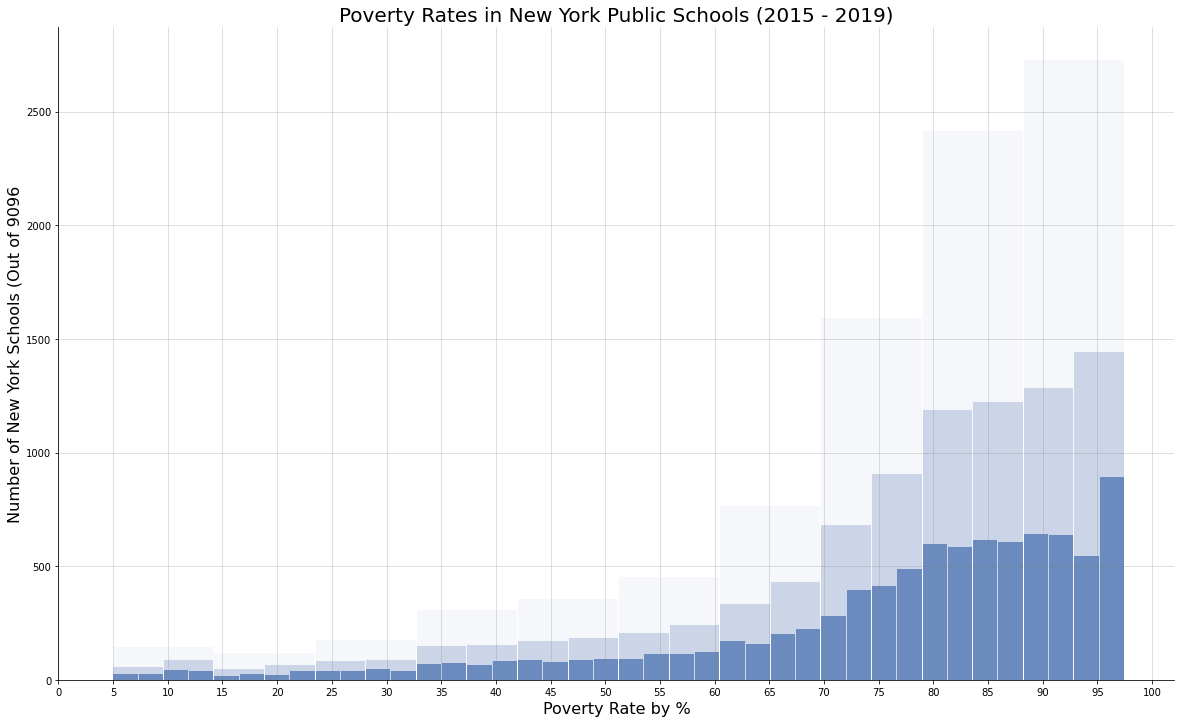

In [50]:
fig, ax = plt.subplots(1, figsize = (20,12), sharex = True, sharey = True)
sns.set_theme()

sns.histplot(x = df_all_poverty['Adjusted Poverty'], bins = 40)
sns.histplot(x = df_all_poverty['Adjusted Poverty'], alpha = .25, bins = 20)
sns.histplot(x = df_all_poverty['Adjusted Poverty'], alpha = .05, bins = 10)

#Labels and Graphics
ax.set_title(f"Poverty Rates in New York Public Schools ({min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)})", size = 20 )
ax.set_xlabel(f"Poverty Rate by %", size = 16)
ax.set_ylabel(f"Number of New York Schools (Out of {len(df_all_poverty)}", size = 16)
ax.grid()

start, end = ax.get_xlim()
stepsize = 5
ax.xaxis.set_ticks(np.arange(start-.3, end, stepsize))

ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
sns.despine()

*Note:* This histogram is a little deceptive because of the encoding any 'higher than 95' as being 95. Regardless, there are a huge number of schools in the New York City school systems with poverty rates that are at least 95%.

Alpha for Boxplot
ref: https://github.com/mwaskom/seaborn/issues/979

New York High Schools show an exponential increasing trend- the number of schools that have higher poverty increases in likelihood the higher the poverty rate increases. In New York High Schools, poverty is very high above 90%.

### Plotting High School Poverty Rates by Year
- What do poverty rates in New York Schools look like, by year?  
- How have they changed over the last 5 years?

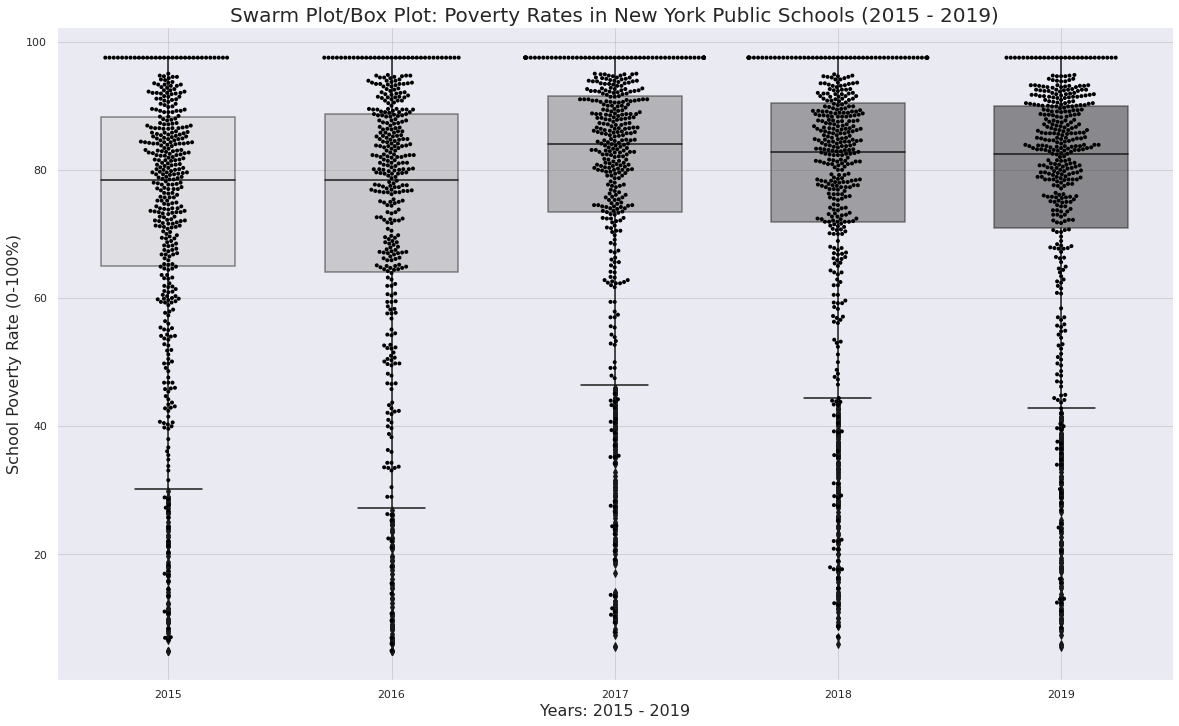

In [51]:
#Set sample size for data (Currently set at half)
sample_size = int(round(len(df_all_poverty) / 2, 0))
sns.set_theme()

df_sample = df_all_poverty.sample(sample_size) #Samples because seaborn limits number of dots

#Plot the data
fig, ax = plt.subplots(1, figsize = (20,12), sharex = True, sharey = True)

sns.swarmplot(x = 'Year_start', 
              y = 'Adjusted Poverty',
              data = df_all_poverty.sample(2000), 
              size = 4,
              alpha = 1,
              color = 'black',)

sns.boxplot(x = 'Year_start', 
            y = 'Adjusted Poverty',
            data = df_all_poverty,
            color = 'black',
            palette = 'gray_r',
            width = .6,
            boxprops=dict(alpha=.5))

#Labels and Graphics
ax.set_title(f"Swarm Plot/Box Plot: Poverty Rates in New York Public Schools ({min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)})", size = 20 )
ax.set_xlabel(f"Years: {min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)}", size = 16)
ax.set_ylabel("School Poverty Rate (0-100%)", size = 16)
ax.grid()

ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
sns.despine()

In [52]:
#Aggregate Statics for Adjusted Poverty
df_all_poverty[['Year_start','Adjusted Poverty']].groupby('Year_start').agg(['mean','median', np.var, np.std, min,max])

Adjusted Poverty                                         
                       mean median         var        std  min   max
Year_start                                                          
2015              73.820472   78.4  392.494246  19.811468  5.0  97.5
2016              73.498384   78.4  418.022456  20.445597  5.0  97.5
2017              78.347163   84.1  373.560421  19.327711  5.6  97.5
2018              77.318478   82.8  367.414003  19.168046  6.0  97.5
2019              76.629872   82.5  377.371276  19.426046  5.6  97.5

## Note on Adjusted Poverty Rate:
There is a noticeable poverty rate spike in 2017, where median adjusted poverty rate rose from 78.4% - 84.1%, and mean adjusted poverty rate rose from 73.2% to 78%. Additionally, the standard deviation was similar, so this appears to be a significant change.

#Focus on New York Public High Schools
One of the issues with the data in the dataset for schools is that New York's schools are not coded by type. I've chosen to look at four different datasets of the Public High Schools, to specifically focus on how poverty rates are, and how they may have changed. 

Other Predictor

In [53]:
full_df.head()

,DBN,School Name_1415,School Type_1415,Enrollment_1415,Rigorous Instruction Rating_1415,Collaborative Teachers Rating_1415,Supportive Environment Rating_1415,Effective School Leadership Rating_1415,Strong Family-Community Ties Rating_1415,Trust Rating_1415,Student Achievement Rating_1415,Rigorous Instruction - Percent Positive_1415,Collaborative Teachers - Percent Positive_1415,Supportive Environment - Percent Positive_1415,Effective School Leadership - Percent Positive_1415,Strong Family-Community Ties - Percent Positive_1415,Trust - Percent Positive_1415,Quality Review - How interesting and challenging is the curriculum?_1415,Quality Review - How effective is the teaching and learning?_1415,Quality Review - How well does the school assess what students are learning?_1415,Quality Review - How well do teachers work with each other?_1415,Quality Review - How clearly are high expectations communicated to students and staff?_1415,Quality Review - Dates of Review_1415,Average Grade 8 English Proficiency_1415,Average Grade 8 Math Proficiency_1415,Percent English Language Learners_1415,Percent Students with Disabilities_1415,Percent Self-Contained_1415,Economic Need Index_1415,Percent in Temp Housing_1415,Percent HRA Eligible_1415,Percent Asian_1415,Percent Black_1415,Percent Hispanic_1415,Percent White_1415,Years of principal experience at this school_1415,Percent of teachers with 3 or more years of experience_1415,Student Attendance Rate_1415,Percent of Students Chronically Absent_1415,Teacher Attendance Rate_1415,...,Supportive Environment Rating_1718,Effective School Leadership Rating_1718,Strong Family-Community Ties Rating_1718,Trust Rating_1718,Student Achievement Rating_1718,Rigorous Instruction - Percent Positive_1718,Collaborative Teachers - Percent Positive_1718,Supportive Environment - Percent Positive_1718,Effective School Leadership - Percent Positive_1718,Strong Family-Community Ties - Percent Positive_1718,Trust - Percent Positive_1718,Quality Review - How interesting and challenging is the curriculum?_1718,Quality Review - How effective is the teaching and learning?_1718,Quality Review - How well does the school assess what students are learning?_1718,Quality Review - How clearly are high expectations communicated to students and staff?_1718,Quality Review - How well do teachers work with each other?_1718,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718,Quality Review - How well does the school allocate and manage resources?_1718,"Quality Review - How well does the school identify, track, and meet its goals?_1718",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718,Quality Review - How well are school decisions evaluated and adjusted?_1718,Quality Review - Dates of Review_1718,Average Grade 8 English Proficiency_1718,Average Grade 8 Math Proficiency_1718,Percent English Language Learners_1718,Percent Students with Disabilities_1718,Percent Self-Contained_1718,Economic Need Index_1718,Percent Overage/Undercredited_y,Percent in Temp Housing_1718,Percent HRA Eligible_1718,Percent Asian_1718,Percent Black_1718,Percent Hispanic_1718,Percent White_1718,Years of principal experience at this school_1718,Percent of teachers with 3 or more years of experience_1718,Student Attendance Rate_1718,Percent of Students Chronically Absent_1718,Teacher Attendance Rate_1718
0,01M292,Henry Street School for International Studies,High School,255.0,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,...,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,0.82,0.87,0.78,0.91,0.85,0.92,Proficient,Proficient,Proficient,Proficient,Proficient,Well D

Check and apply an average function across the four years for each item (so that we can compare them later). 

In [54]:
eco_need_cols = [col for col in full_df.columns if "economic need" in col.lower()]
full_df[['DBN'] + eco_need_cols].head()

,DBN,Economic Need Index_1415,Economic Need Index_1516,Economic Need Index_1617,Economic Need Index_1718
0,01M292,0.832,0.881,0.832,0.898
1,01M448,0.812,0.771,0.757,0.825
2,01M450,0.610,0.591,0.586,0.648
3,01M509,0.767,0.794,0.767,0.823
4,01M539,0.257,0.278,0.359,0.434


In [55]:
def avg_cols(dataframe_, term = ""):
    cols_ = [col for col in dataframe_.columns if term in col.lower()]
    
    if len(cols_) > 0:
        return dataframe_[cols_].mean(axis = 1, skipna = True)
    
    else:
        print("No terms found to average")
        return ""

In [56]:
full_df['Economic Need Average'] = avg_cols(full_df, "economic need")

In [57]:
full_df['Economic Need Average'][0:3]

0    0.86075
1    0.79125
2    0.60875
Name: Economic Need Average, dtype: float64

In [58]:
full_df['HRA average'] = avg_cols(full_df, "hra")

In [59]:
full_df['HRA average']

0      0.68375
1      0.60575
2      0.44200
3      0.64975
4      0.24600
        ...   
515    0.70400
516    0.55700
517    0.65100
518    0.71400
519    0.77900
Name: HRA average, Length: 520, dtype: float64

In [60]:
full_df['Temp Housing Avg'] = avg_cols(full_df, "temp housing")

In [61]:
full_df['Temp Housing Avg'][0:3]

0    0.20500
1    0.20575
2    0.05550
Name: Temp Housing Avg, dtype: float64

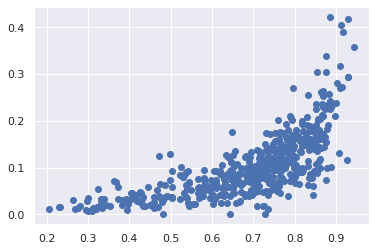

In [62]:
#Let's Plot the Findings
plt.scatter(y = full_df['Temp Housing Avg'], 
            x = full_df['Economic Need Average'])

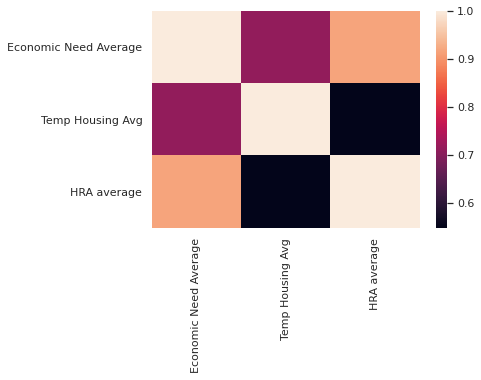

In [63]:
all_df_corr = full_df[['Economic Need Average', 'Temp Housing Avg', 'HRA average']].corr()
all_df_corr['Economic Need Average'].sort_values(ascending = False)

sns.heatmap(all_df_corr, 
        xticklabels=all_df_corr.columns,
        yticklabels=all_df_corr.columns)

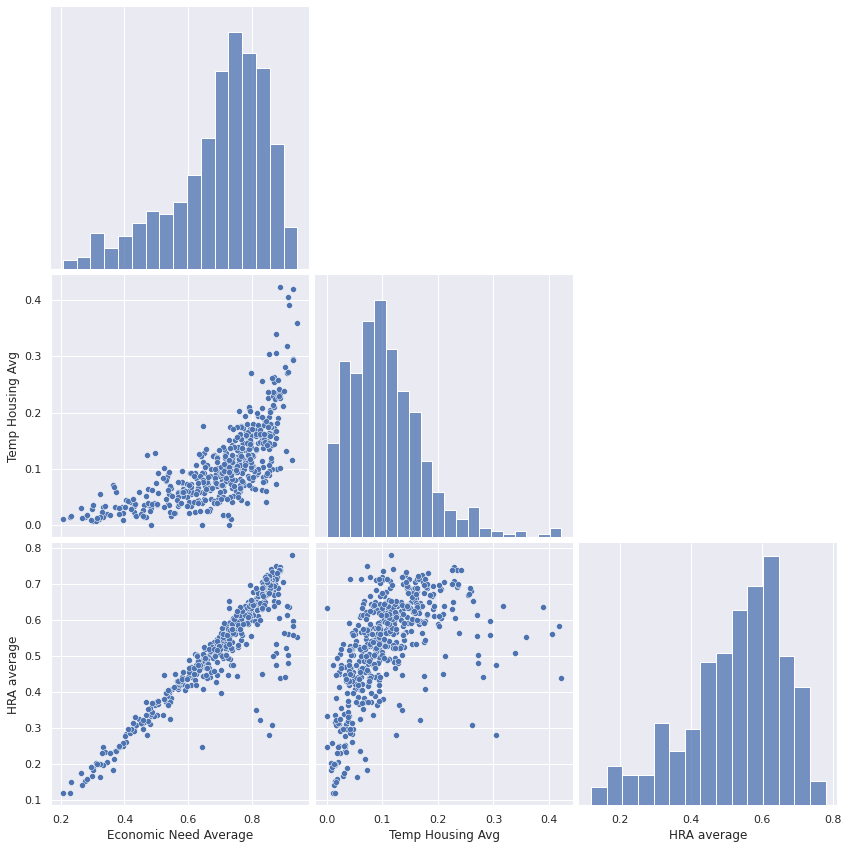

In [80]:
#Pairplot of the features we are looking for
sns.pairplot(full_df[['Economic Need Average', 'Temp Housing Avg', 'HRA average']],
             dropna = True,
             height = 4,
             corner = True)

From the plots, we can see how strong the Economic Need to HRA average is (looks almost like a straight line). Temp housing and HRA also have a relatively strong correlation.

What's troubling here is how correlated 'Percent Hispanic' is to the economic need index. It is interesting, and troubling, to note that the more hispanic the school, the higher the need becomes, but this correlation is even stronger than correlation between need and those in temporary housing. No other group trends so strongly; schools with higher African American populations correlate weakly. 

In looking at simple racial disparities in terms of economic need, schools with high caucasian populations appear to be much lower on the Economic Need Index, with a somewhat-strong negative -.657 correlation.

More positive is that as economic need rises, there are only small negative correlations in Effective School Leadership, Teacher Attendance, Supportive Enviromnents, and Rigor of instruction. This suggests that students' education is not largely negatively impacted, regardless of economic level. 

In [65]:
#sns.scatterplot(x = all_dfs['Percent Hispanic'], y = all_dfs['Economic Need Index'])
sns.regplot(x = all_dfs['Percent Hispanic'], y = all_dfs['Economic Need Index'], color = 'blue')

TypeError: ignored

# Display a Dashboard of All Metrics Changes  
Ref: https://www.datacamp.com/community/tutorials/learn-build-dash-python


In [ ]:
!pip install dash

In [ ]:
#Let's make a dashboard
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

In [ ]:
df_all_poverty[['Year_start','Adjusted Poverty']].groupby('Year_start').agg(['mean','median', np.var, np.std, min,max])

In [ ]:
app.layout = html.Div(
    children=[
        html.H1(children="Avocado Analytics",),
        html.P(
            children="Analyze the behavior of avocado prices"
            " and the number of avocados sold in the US"
            " between 2015 and 2018",
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": df_all_poverty['Year_start'],
                        "y": df_all_poverty['Adjusted Poverty'],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Average Price of Avocados"},
            },
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": df_all_poverty['Year_start'],
                        "y": df_all_poverty['Adjusted Poverty'],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Avocados Sold"},
            },
        ),
    ]
)

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)